<a href="https://colab.research.google.com/github/Hallyeo/Data-Analysis-with-Open-Source/blob/main/%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. API 인증키 발급 및 데이터 수집**

In [1]:
import requests
import json
import time

# 1. 설정 변수 정의
# ----------------------------------------------------------------------
YOUR_API_KEY = "776164685877777738384575645171"
BASE_URL = "http://openapi.seoul.go.kr:8088/"
SERVICE_NAME = "energyUseDataSummaryInfo"
DATA_TYPE = "json"

# 요청할 데이터의 범위
START_YEAR = 2015
END_YEAR = 2024

MAX_CALL_COUNT = 1000 # 한 번에 가져올 최대 건수 (페이지네이션 기준)
# ----------------------------------------------------------------------

# 2. 데이터 저장소 초기화 및 수집 루프 (2015년 1월 ~ 2024년 12월 전체)
collected_data = [] # 실제 데이터를 저장할 리스트
total_requests = 0

print("🔍 데이터 수집 시작...")

for year in range(START_YEAR, END_YEAR + 1):
    for month in range(1, 13):

        start_row = 1 # 페이지네이션 시작

        # 페이지네이션 루프 시작
        while True:
            end_row = start_row + MAX_CALL_COUNT - 1

            # API 호출 URL 구성
            url = (f"{BASE_URL}/{YOUR_API_KEY}/{DATA_TYPE}/{SERVICE_NAME}/"
                   f"{start_row}/{end_row}/")

            # 요청 매개변수
            params = {
                'YEAR': str(year),
                'MON': f"{month:02d}",
            }

            total_requests += 1
            print(f"📡 요청 시도 ({total_requests}회차): {year}년 {month:02d}월, 범위: {start_row}~{end_row}")

            try:
                response = requests.get(url, params=params)

                # 3. HTTP 상태 코드 확인 (200이면 성공)
                if response.status_code == 200:
                    data = response.json()
                    service_result = data.get(SERVICE_NAME)

                    if service_result:
                        rows = service_result.get('row', [])
                        total_count = service_result.get('list_total_count', 0)

                        if rows:
                            collected_data.extend(rows) # 데이터 저장
                            print(f"  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. {len(rows)}건 수집"
                            "(총 {total_count}건).")

                            # 다음 페이지 확인
                            if end_row >= total_count:
                                break
                            else:
                                start_row += MAX_CALL_COUNT
                                time.sleep(0.1) # 짧은 대기
                        else:
                            print(f"  ℹ️ **API 호출 성공 (HTTP 200), 데이터 없음** (총 0건).")
                            break # 데이터 없음
                    else:
                        result_info = data.get('RESULT', {})
                        if result_info.get('CODE') in ['INFO-000', 'INFO-300']:
                            print(f"  ℹ️ **API 호출 성공 (HTTP 200), 응답 코드 반환**: {result_info.get('CODE')}")
                            break
                        else:
                            print(f"  ❌ **API 호출 성공 (HTTP 200), 예상치 못한 응답 구조/오류**: "
                             "{result_info.get('MESSAGE', '구조 오류')}")
                            break
                else:
                    print(f"❌ **API 호출 실패: HTTP 상태 코드 {response.status_code}**")
                    break

            except requests.exceptions.RequestException as e:
                print(f"🚨 API 요청 오류 발생 ({year}.{month:02d}): {e}")
                break
            except json.JSONDecodeError:
                print(f"⚠️ JSON 파싱 오류 발생 ({year}.{month:02d}).")
                break
            except Exception as e:
                print(f"⚠️ 예상치 못한 오류 발생 ({year}.{month:02d}): {e}")
                break

        time.sleep(0.05) # 월별 API 호출 후 잠시 대기

print("\n" + "="*50)
print(f"🎉 **데이터 수집 완료.** 총 {len(collected_data)}건의 Raw 데이터 수집.")
print("="*50)

🔍 데이터 수집 시작...
📡 요청 시도 (1회차): 2015년 01월, 범위: 1~1000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 1000건 수집 (총 1241건).
📡 요청 시도 (2회차): 2015년 01월, 범위: 1001~2000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 241건 수집 (총 1241건).
📡 요청 시도 (3회차): 2015년 02월, 범위: 1~1000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 1000건 수집 (총 1241건).
📡 요청 시도 (4회차): 2015년 02월, 범위: 1001~2000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 241건 수집 (총 1241건).
📡 요청 시도 (5회차): 2015년 03월, 범위: 1~1000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 1000건 수집 (총 1241건).
📡 요청 시도 (6회차): 2015년 03월, 범위: 1001~2000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 241건 수집 (총 1241건).
📡 요청 시도 (7회차): 2015년 04월, 범위: 1~1000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 1000건 수집 (총 1241건).
📡 요청 시도 (8회차): 2015년 04월, 범위: 1001~2000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 241건 수집 (총 1241건).
📡 요청 시도 (9회차): 2015년 05월, 범위: 1~1000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 1000건 수집 (총 1241건).
📡 요청 시도 (10회차): 2015년 05월, 범위: 1001~2000
  ✅ **API 호출 성공 (HTTP 200), 데이터 수집** 완료. 241건 수집 (총 12

## **2. 데이터 변환 및 전처리**

In [38]:
import pandas as pd

# 2-1. DataFrame 변환, 개인 유형 필터링 및 현년 사용량 컬럼 추출
if collected_data:
    df = pd.DataFrame(collected_data)

if 'df' in locals():
    print("## [필터링 전] 원본 DataFrame 기본 정보")
    print(f"- DataFrame 크기 (Raw): {df.shape[0]} 행, {df.shape[1]} 열")
    print("\n- 컬럼 정보 (df.info()):")
    df.info()

    # 1. '개인' 유형만 필터링 (MM_TYPE 컬럼 사용)
    # 2. YEAR 컬럼을 정수형으로 변환 (이미 YEAR 컬럼이 있지만, 안전을 위해 정수형 변환)
    # 3. MON 컬럼도 정수형으로 변환 (계절 구분에 사용)
    df['MM_TYPE'] = df['MM_TYPE'].astype(str)
    df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').astype('Int64')
    df['MON'] = pd.to_numeric(df['MON'], errors='coerce').astype('Int64')

    try:
        INDIVIDUAL_TYPE = '개인'

        # 1. '개인 유형' 및 요청 범위(2015.01 ~ 2024.12) 필터링
        df_filtered = df[
            # 개인 유형 필터링
            (df['MM_TYPE'] == INDIVIDUAL_TYPE) &

            # 2015년 이후 데이터만 선택
            (df['YEAR'] >= 2015) &

            # 2024년 12월 이전 데이터만 선택 (요청 범위)
            ((df['YEAR'] < 2024) | ((df['YEAR'] == 2024) & (df['MON'] <= 12)))
        ].copy()


        # 2. 현년 사용량 컬럼만 선택
        REQUIRED_COLUMNS = ['YEAR', 'MON', 'MM_TYPE',
                            'EUS',  # 현년 전기사용량
                            'GUS',  # 현년 가스사용량
                            'WUS',  # 현년 수도사용량
                            'HUS'   # 현년 지역난방사용량
                           ]

        # 실제 df에 존재하는 컬럼만 선택
        final_columns = [col for col in REQUIRED_COLUMNS if col in df_filtered.columns]
        df_final = df_filtered[final_columns]

        print("\n**개인 유형 및 4대 에너지원 현년 사용량 컬럼 추출 완료.**")
        print(f"최종 '개인 유형' 데이터 건수: {len(df_final)}건")

        print("\n--- 최종 DataFrame 상위 5개 행 ---")
        print(df_final.head())

        print("\n--- 최종 DataFrame 컬럼 정보 ---")
        df_final.info()

    except KeyError as e:
        print(f"\n **필터링 오류:** API 응답 데이터에 필요한 컬럼 ({e})이 없습니다.")
        print("API 응답 구조와 제공된 출력값을 다시 비교하여 컬럼명을 수정하세요.")

## [필터링 전] 원본 DataFrame 기본 정보
- DataFrame 크기 (Raw): 148920 행, 25 열

- 컬럼 정보 (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148920 entries, 0 to 148919
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   YEAR      148920 non-null  object
 1   MON       148920 non-null  object
 2   MM_TYPE   148920 non-null  object
 3   CNT       148920 non-null  object
 4   EUS       148920 non-null  object
 5   EUS1      148920 non-null  object
 6   EUS2      148920 non-null  object
 7   ECO2_1    148920 non-null  object
 8   ECO2_2    148920 non-null  object
 9   GUS       148920 non-null  object
 10  GUS1      148920 non-null  object
 11  GUS2      148920 non-null  object
 12  GCO2_1    148920 non-null  object
 13  GCO2_2    148920 non-null  object
 14  WUS       148920 non-null  object
 15  WUS1      148920 non-null  object
 16  WUS2      148920 non-null  object
 17  WCO2_1    148920 non-null  object
 18  WCO2_2    14892

In [30]:
# 2-2. 연도 및 계절 컬럼 추가 전처리

if 'df_final' in locals() and not df_final.empty:

    # 계절(season) 컬럼 추가 함수 정의
    def get_season(month):
        if month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Autumn'
        elif month in [12, 1, 2]:
            return 'Winter'
        else:
            return 'etc'

    # 연도(year)와 계절(season) 컬럼 적용
    df_final['year'] = pd.to_numeric(df_final['YEAR'], errors='coerce').astype('Int64')
    df_final['season'] = df_final['MON'].apply(get_season)

    # 변환 결과 확인을 위한 출력
    print("**연도 및 계절 컬럼 추가 완료.**")
    print(f"\n- DataFrame 크기: {df_final.shape[0]} 행, {df_final.shape[1]} 열")

    # 추가된 컬럼 확인을 위해 상위 5개 행 출력
    print("\n- 상위 5개 데이터 미리보기 (계절 컬럼 포함):")
    print(df_final.head())

    # 계절별 데이터가 잘 분포되었는지 확인 (간단한 집계)
    print("\n- 계절별 데이터 건수 확인:")
    print(df_final['season'].value_counts())

    # 데이터 타입 확인
    print("\n- 컬럼 정보 (df_final.info()):")
    df_final.info()

else:
    print("\n 이전 단계에서 최종 데이터프레임(df_final)이 생성되지 않았거나 비어있어 2-2 단계를 실행할 수 없습니다.")

**연도 및 계절 컬럼 추가 완료.**

- DataFrame 크기: 14400 행, 9 열

- 상위 5개 데이터 미리보기 (계절 컬럼 포함):
    YEAR  MON MM_TYPE        EUS       GUS         WUS          HUS  year  \
47  2024   12      개인  134828126  42103424   7326853.6  1513199.277  2024   
51  2024   11      개인  257927956  17418221  14678672.5  8836296.454  2024   
62  2024   10      개인  282268119   8233421  15297669.9  2695491.396  2024   
65  2024    9      개인  409872908   5729131  15143321.6  3420507.136  2024   
70  2024    8      개인  463971328   7072251  15873544.6   130082.263  2024   

    season  
47  Winter  
51  Autumn  
62  Autumn  
65  Autumn  
70  Summer  

- 계절별 데이터 건수 확인:
season
Winter    3600
Autumn    3600
Summer    3600
Spring    3600
Name: count, dtype: int64

- 컬럼 정보 (df_final.info()):
<class 'pandas.core.frame.DataFrame'>
Index: 14400 entries, 47 to 148560
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   YEAR     14400 non-null  Int64 
 1   MON      14400 no

# **3. 데이터 시각화**

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [20]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

시각화 완료 및 그래프 저장: 파일명 'Annual Total Energy Usage Change_3557.png'



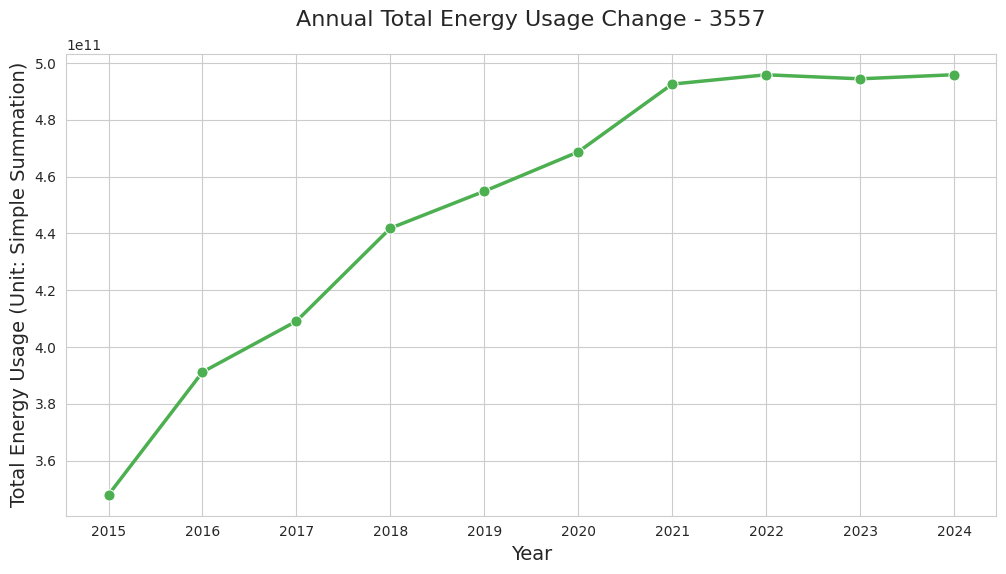

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore')

# 3-1. 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량 시각화
if 'df_final' in locals() and not df_final.empty:

    STUDENT_ID_LAST_FOUR = "3557"

    # 1. 시각화를 위한 데이터 전처리

    # EUS, GUS, WUS, HUS 컬럼을 숫자형(Float)으로 변환 (NaN은 0으로 처리하지 않고 그대로 둔다)
    energy_cols = ['EUS', 'GUS', 'WUS', 'HUS']
    for col in energy_cols:
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

    # 총 사용량 컬럼 계산
    df_final['TOTAL_USE'] = df_final[energy_cols].sum(axis=1)

    # 2. 연도별 총 사용량 집계
    # 'year' 컬럼을 기준으로 그룹화하고 총 사용량을 합산
    df_yearly = df_final.groupby('year')['TOTAL_USE'].sum().reset_index()

    # 3. 데이터 시각화
    sns.set_style("whitegrid")

    plt.figure(figsize=(12, 6))

    # 선 그래프 생성
    sns.lineplot(x='year', y='TOTAL_USE', data=df_yearly,
                 marker='o', markersize=8, linewidth=2.5, color='#4CAF50')

    # 그래프 제목 및 라벨 설정
    title = f"Annual Total Energy Usage Change - {STUDENT_ID_LAST_FOUR}"
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Total Energy Usage (Unit: Simple Summation)", fontsize=14)

    # x축 눈금 설정 (정수형 연도만 표시)
    plt.xticks(df_yearly['year'].astype(int).unique())

    # 4. 그래프 저장
    filename = f"Annual Total Energy Usage Change_{STUDENT_ID_LAST_FOUR}.png"
    plt.savefig(filename, dpi=300)


    print(f"시각화 완료 및 그래프 저장: 파일명 '{filename}'\n")

    # 그래프를 화면에 출력
    plt.show()

else:
    print("\n 최종 데이터프레임(df_final)이 없거나 비어있어 시각화를 수행할 수 없습니다.")


## 3-2. 계절별 가스 사용량 평균 시각화 결과



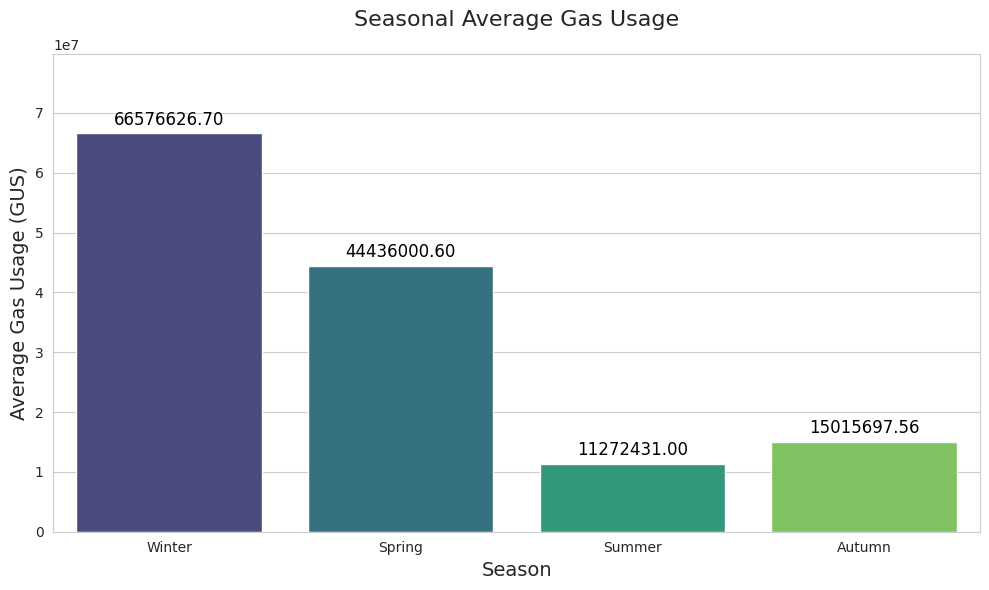

In [35]:
if 'df_final' in locals() and not df_final.empty:

    # 계절별(season) 가스 사용량(GUS) 평균 집계
    df_final['GUS'] = pd.to_numeric(df_final['GUS'], errors='coerce')
    df_seasonal_gas = df_final.groupby('season')['GUS'].mean().reset_index()

    # 계절 순서 정의
    season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
    df_seasonal_gas['season'] = pd.Categorical(df_seasonal_gas['season'], categories=season_order, ordered=True)
    df_seasonal_gas = df_seasonal_gas.sort_values('season')

    # 데이터 시각화
    sns.set_style("whitegrid")

    plt.figure(figsize=(10, 6))

    # 막대 그래프 생성
    ax = sns.barplot(x='season', y='GUS', data=df_seasonal_gas, palette="viridis")

    # 그래프 제목 및 라벨 설정
    title = f"Seasonal Average Gas Usage"
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("Average Gas Usage (GUS)", fontsize=14)

    # 각 막대에 구체적인 수치 표시
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', # 소수점 둘째 자리까지 표시
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

    plt.ylim(0, df_seasonal_gas['GUS'].max() * 1.2) # Y축 범위 조정
    plt.tight_layout()

    # 그래프 저장
    filename = f"Seasonal_Average_Gas_Usage.png"
    plt.savefig(filename, dpi=300)

    print("## 3-2. 계절별 가스 사용량 평균 시각화 결과\n")

    plt.show()

else:
    print("\n 최종 데이터프레임(df_final)이 없거나 비어있어 시각화를 수행할 수 없습니다.")